# 中高层 8-18（不含一楼）

In [1]:
import pandas as pd 
data = pd.read_excel(r'C:\Users\Dl\Desktop\宿州市住宅类可比实例入库版20180529.xlsx')
data = data[4300:]
data.info()
DEGREE = 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 4300 to 10711
Data columns (total 14 columns):
城市      6412 non-null object
行政区域    6412 non-null object
类型      6412 non-null object
小区名称    6412 non-null object
地址      6392 non-null object
所在楼层    6412 non-null int64
总楼层     6412 non-null int64
面积      6412 non-null float64
结构      6412 non-null object
建筑年代    6412 non-null int64
朝向      6412 non-null object
装修      6412 non-null object
买卖时间    6412 non-null datetime64[ns]
单价      6412 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 701.4+ KB


In [2]:
data1 = data[(data['总楼层'] >= 8)&(data['总楼层'] <= 18)]
data1.shape

(1595, 14)

In [3]:
def process(data):
    # data = data[(data['所在楼层'] != 1)&(data['所在楼层'] != data['总楼层'])]
    data['ratio'] = data['所在楼层']/data['总楼层']
    pivot_price = {}
    for name,group in data.groupby('小区名称'):
        pivot_price[name] = group['单价'].mean()
    data['pivot'] = data['小区名称'].apply(lambda x:pivot_price[x])
    data['ratio_price'] = data['单价']/data['pivot']
    data = data[data['ratio_price'] <= 1.2]
    x = data['ratio']
    y = data['ratio_price']
    return data
data = process(data)
data.to_excel(r'C:\Users\Dl\Desktop\suzhou.xlsx')

# 不含一楼和顶楼

In [4]:
def process(data):
    data = data[(data['所在楼层'] != 1)&(data['所在楼层'] != data['总楼层'])]
    data['ratio'] = data['所在楼层']/data['总楼层']
    pivot_price = {}
    for name,group in data.groupby('小区名称'):
        pivot_price[name] = group['单价'].mean()
    data['pivot'] = data['小区名称'].apply(lambda x:pivot_price[x])
    data['ratio_price'] = data['单价']/data['pivot']
    data = data[data['ratio_price'] <= 1.2]
    x = data['ratio']
    y = data['ratio_price']
    return x,y
x,y = process(data1)
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
pf = PolynomialFeatures(degree=DEGREE)
x = x.reshape(-1,1)
x = pf.fit_transform(x)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [5]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=[1e-4,1e-5,1e-3,1e-2,1e-1,1e0])
model.fit(x,y)
yp = model.predict(x)
loss = np.abs(yp-y)/y
np.mean(loss)

0.004674282782590163

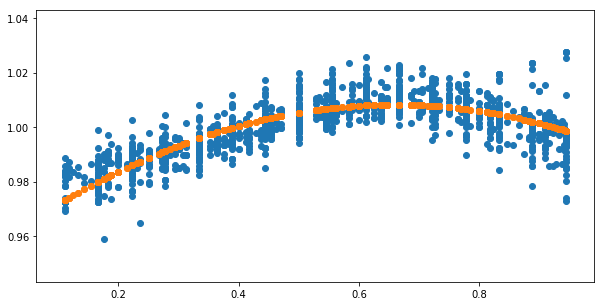

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(10,5))
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],yp)

In [7]:
model.intercept_,model.coef_

(0.9574593903950805, array([ 0.        ,  0.15415356, -0.11701955]))

## 顶楼

In [8]:
def ding_process(data):
    data = data[data['所在楼层'] == data['总楼层']]
    pivot_price = {}
    for name,group in data.groupby('小区名称'):
        pivot_price[name] = group['单价'].mean()
    data['pivot'] = data['小区名称'].apply(lambda x:pivot_price[x])
    data['ratio_price'] = data['单价']/data['pivot']
    data = data[data['ratio_price'] <= 1.2]
    x = data['总楼层']
    y = data['ratio_price']
    return x,y
x,y = ding_process(data1)
x.shape

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(118,)

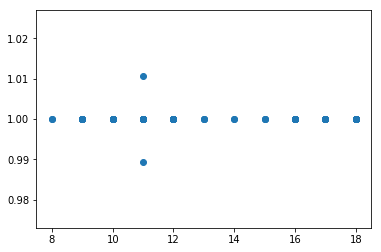

In [9]:
plt.scatter(x,y)

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(10,5))
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],yp)

ValueError: Can only tuple-index with a MultiIndex

<Figure size 720x360 with 0 Axes>

# 中高层公式（不含一楼与顶楼）：

系数
    $$K = -0.11701955*(\frac{n}{N})^2 + 0.15415356 * (\frac{n}{N}) + 0.95745939$$
    
评估价格
$$P = P_{jizhun} * K$$

其中$N$是总楼层，$n$是存量房所在楼层

# 中高层公式（不含一楼）：

系数
    $$K = -0.18040865*(\frac{n}{N})^2 + 0.21449544 * (\frac{n}{N}) + 0.948575844$$

# 超高层 >= 34

In [ ]:
data2 = data[data['总楼层'] >= 34]
x,y = process(data2)
pf = PolynomialFeatures(degree=DEGREE)
x = x.reshape(-1,1)
x = pf.fit_transform(x)
model = RidgeCV(alphas=[1e-4,1e-5,1e-3,1e-2,1e-1,1e0])
model.fit(x,y)
yp = model.predict(x)
loss = np.abs(yp-y)/y
np.mean(loss)

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(10,5))
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],yp)
model.intercept_,model.coef_

# 超高层公式（不含一楼与顶楼）：

系数
    $$K = -0.21546597*(\frac{n}{N})^2 + 0.2572241 * (\frac{n}{N}) + 0.939861744$$
    
评估价格
$$P = P_{jizhun} * K$$

其中$N$是总楼层，$n$是存量房所在楼层

# 超高层公式（不含一楼）：

系数
    $$K = -0.2593945*(\frac{n}{N})^2 + 0.2955 * (\frac{n}{N}) + 0.935884$$

# 高层19-33

In [ ]:
data3 = data[(data['总楼层'] >= 19)&(data['总楼层'] <=33)]
x,y = process(data3)
pf = PolynomialFeatures(degree=DEGREE)
x = x.reshape(-1,1)
x = pf.fit_transform(x)
model = RidgeCV(alphas=[1e-4,1e-5,1e-3,1e-2,1e-1,1e0])
model.fit(x,y)
yp = model.predict(x)
loss = np.abs(yp-y)/y
np.mean(loss)

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(10,5))
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],yp)
model.intercept_,model.coef_

## 高层公式（不含一楼和顶楼）：

系数
    $$K = -0.18965087*(\frac{n}{N})^2 + 0.23290789 * (\frac{n}{N}) + 0.9426030836$$
    
评估价格
$$P = P_{jizhun} * K$$

其中$N$是总楼层，$n$是存量房所在楼层

## 高层公式（不含一楼）：

系数
    $$K = -0.225208*(\frac{n}{N})^2 + 0.26472788 * (\frac{n}{N}) + 0.939017143$$

In [ ]:
data1.shape,data2.shape,data3.shape